<a href="https://colab.research.google.com/github/marcinmat7/Reinforcement-learning---SGH/blob/master/Projekt_minimum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ściągnięcie danych na dysk:

In [ ]:
url = "https://archive.org/download/stackexchange/bitcoin.stackexchange.com.7z"
!pip install py7zr

import urllib.request 
import py7zr
filename = "bitcoin.7z"
urllib.request.urlretrieve(url, filename)
with py7zr.SevenZipFile(filename, mode='r') as z:
    z.extractall()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.0/379.0 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.0 MB/s eta 0:00:00


In [ ]:
!pip install pyspark
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=6cd6c3ca5bab0c0b8c1b3d5c0e7aa34d62e441cc7763a55f6d7857f8f7ac5ec6
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
! pyspark --packages com.databricks:spark-xml_2.12:0.15.0

Python 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
:: loading settings :: url = jar:file:/usr/local/lib/python3.8/dist-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.databricks#spark-xml_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-57a5d67c-b3aa-4efd-a54b-adaf944af579;1.0
	confs: [default]
	found com.databricks#spark-xml_2.12;0.15.0 in central
	found commons-io#commons-io;2.11.0 in central
	found org.glassfish.jaxb#txw2;3.0.2 in central
	found org.apache.ws.xmlschema#xmlschema-core;2.3.0 in central
downloading https://repo1.maven.org/maven2/com/databricks/spark-xml_2.12/0.15.0/spark-xml_2.12-0.15.0.jar ...
	[SUCCESSFUL ] com.databricks#spark-xml_2.12;0.15.0!spark-xml_2.12.jar (50ms)
downloading https://repo1.maven.or

from pyspark.sql.types import *

df = spark.read.format('xml').options(rowTag='row').load('Posts.xml')

df.write.parquet("df_posts.parquet")

df = spark.read.format('xml').options(rowTag='row').load('Users.xml')

df.write.parquet("df_users.parquet")

df = spark.read.format('xml').options(rowTag='row').load('Comments.xml')

df.write.parquet("df_comments.parquet")

df = spark.read.format('xml').options(rowTag='row').load('Votes.xml')

df.write.parquet("df_votes.parquet")

quit()


In [ ]:
import pyspark
sc = pyspark.SparkContext(appName="RDDstart")
from pyspark import SparkContext
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


a. liczba postów na przestrzeni czasu (lineplot/barplot)

In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), StringType()) 
df_posts_sp = df_posts_sp.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))


<BarContainer object of 12 artists>

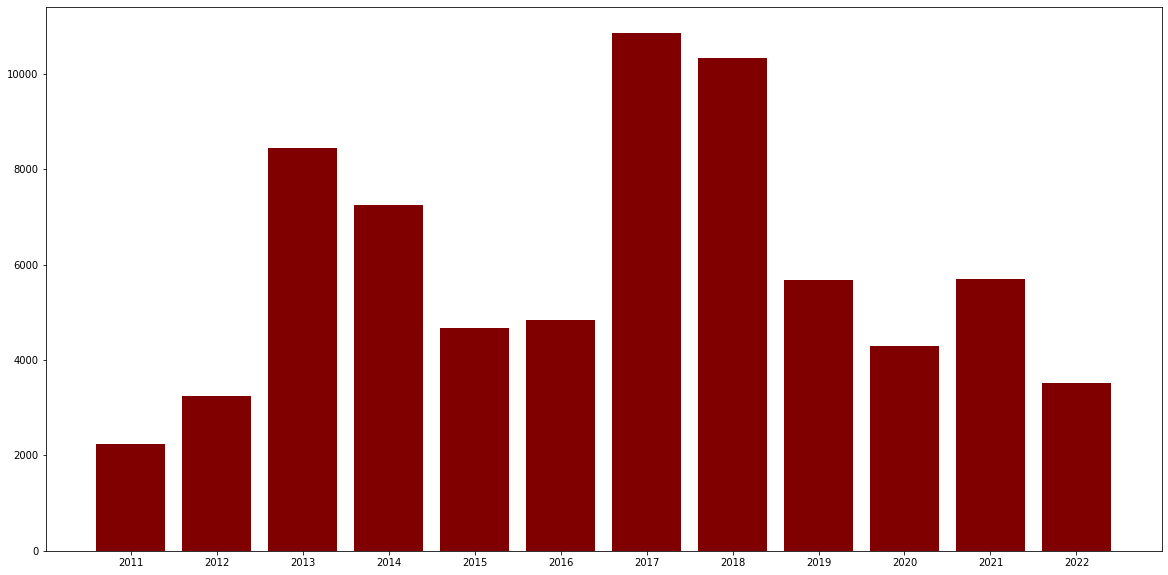

In [ ]:
import pandas as pd

states2=df_posts_sp.rdd.map(lambda x: x.Creation_date_1).collect()
states3 = pd.Series(states2)
states3 = states3.value_counts()
states3 = states3.sort_index()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(states3.keys(), states3.values, color ='maroon')

In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

def get_month(x):
    return x.year * 100 + x.month 
get_month_udf = udf(lambda x:get_month(x), StringType()) 
df_posts_sp = df_posts_sp.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))

<BarContainer object of 137 artists>

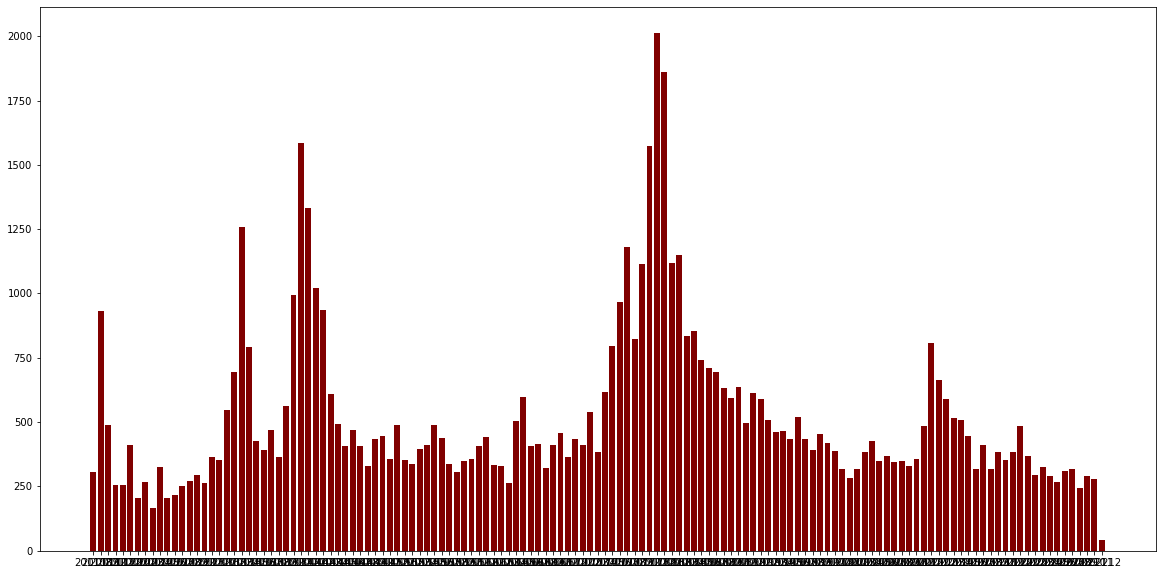

In [ ]:
import pandas as pd

states2=df_posts_sp.rdd.map(lambda x: x.Creation_date_1).collect()
states3 = pd.Series(states2)
states3 = states3.value_counts()
states3 = states3.sort_index()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(states3.keys(), states3.values, color ='maroon')

In [ ]:
def get_month(x):
    return x.year * 100 + x.month
get_month_udf = udf(lambda x:get_month(x), IntegerType()) 
df_posts_sp = df_posts_sp.withColumn("Creation_date_2", get_month_udf(col("_CreationDate")))
df_posts_sp_2 = ps.DataFrame(df_posts_sp)
df_posts_sp3 = df_posts_sp.groupBy("Creation_date_2").count()
df_posts_sp3 = df_posts_sp3.sort(col("Creation_date_2"))
df_posts_ps4 = ps.DataFrame(df_posts_sp3)
df_posts_ps4 = df_posts_ps4.reset_index()
df_posts_ps4.plot.line(x='index', y='count')

In [ ]:
df_posts_ps4[0:5]

,index,Creation_date_2,count
0,0,2011,2235
1,1,2012,3244
2,2,2013,8436
3,3,2014,7244
4,4,2015,4668


In [ ]:
def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), IntegerType()) 
df_posts_sp = df_posts_sp.withColumn("Creation_date_2", get_month_udf(col("_CreationDate")))
df_posts_sp_2 = ps.DataFrame(df_posts_sp)
df_posts_sp3 = df_posts_sp.groupBy("Creation_date_2").count()
df_posts_sp3 = df_posts_sp3.sort(col("Creation_date_2"))
df_posts_ps4 = ps.DataFrame(df_posts_sp3)
df_posts_ps4 = df_posts_ps4.reset_index()
df_posts_ps4.plot.line(x='index', y='count')

b. czas na forum (od pojawienia się użytkownika do ostatniego posta/komentarza) 10 najdłużej aktywnych użytkowników (pomijając boty) (barplot)

In [ ]:
# Load datasets

df_users = sqlContext.read.parquet("df_users.parquet")
import pyspark.pandas as ps
df_users_ps = ps.DataFrame(df_users)
df_users_sp = df_users_ps.to_spark()

df_comments = sqlContext.read.parquet("df_comments.parquet")
import pyspark.pandas as ps
df_comments_ps = ps.DataFrame(df_comments)
df_comments_sp = df_comments_ps.to_spark()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
df_posts_ps1 = df_posts_ps[["_OwnerUserId", "_CreationDate"]].groupby("_OwnerUserId").max()
df_comments_ps1 = df_comments_ps[["_UserId", "_CreationDate"]].groupby("_UserId").max()

In [ ]:
df_users_ps2 = df_users_ps[["_Id", "_CreationDate", "_DisplayName"]]
df3 = df_users_ps2.join(df_posts_ps1, lsuffix = "_usr", rsuffix = "_posts")

In [ ]:
df3 = df3.set_index("_Id")

In [ ]:
df4 = df3.join(df_comments_ps1, lsuffix = "", rsuffix = "")

In [ ]:
df5 = df4.to_spark()
from pyspark.sql.functions import *
from pyspark.sql.functions import round, col, max
df6 = df5.select(
      col("_DisplayName"),
      round(months_between(col("_CreationDate_posts"), col("_CreationDate_usr")), 0).alias("Czas_1"),      
      round(months_between(col("_CreationDate"), col("_CreationDate_usr")), 0).alias("Czas_2"),
    )

df7 = df6.withColumn("Czas", 
      when((df6.Czas_1.isNull() & df6.Czas_2.isNull()), -1)
      .when((df6.Czas_1.isNull() & ~df6.Czas_2.isNull()), df6.Czas_2)
      .when((~df6.Czas_1.isNull() & df6.Czas_2.isNull()), df6.Czas_1)
      .when((~df6.Czas_1.isNull() & ~df6.Czas_2.isNull()) & (df6.Czas_1 >= df6.Czas_2), df6.Czas_1)
      .otherwise(df6.Czas_2))

df7 = df7.sort(col("Czas").desc())
df7 = ps.DataFrame(df7)

In [ ]:
df7.head(10)

,_DisplayName,Czas_1,Czas_2,Czas
0,Daniel,135.0,NaN,135.0
1,David Schwartz,0.0,135.0,135.0
2,Jason Keith,135.0,NaN,135.0
3,cdecker,NaN,135.0,135.0
4,Peter Smit,135.0,NaN,135.0
5,Pieter Wuille,32.0,135.0,135.0
6,Caleb,135.0,NaN,135.0
7,blee,29.0,134.0,134.0
8,Ash Moran,133.0,0.0,133.0
9,Fernando N.,NaN,130.0,130.0


c. porównanie najwyżej i najniżej ocenianych pytań (długość, tagi, liczba odpowiedzi) (2)

In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_ps = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]

print(df_posts_ps['_Score'].quantile(.05))
print(df_posts_ps['_Score'].quantile(.95))

df_posts_ps_best = df_posts_ps[df_posts_ps['_Score'] > df_posts_ps['_Score'].quantile(.95)].to_spark()
df_posts_ps_worst = df_posts_ps[df_posts_ps['_Score'] < df_posts_ps['_Score'].quantile(.05)].to_spark()

0.0
9.0


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



dlugosc

In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_ps = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]

print(df_posts_ps['_Score'].quantile(.05))
print(df_posts_ps['_Score'].quantile(.95))

df_posts_ps_best = df_posts_ps[df_posts_ps['_Score'] > df_posts_ps['_Score'].quantile(.95)].to_spark()
df_posts_ps_worst = df_posts_ps[df_posts_ps['_Score'] < df_posts_ps['_Score'].quantile(.05)].to_spark()

def len1(x):
    return len(x)
#len1_udf = udf(lambda x: len1(x) if len1(x) < 2500 else 2500, IntegerType()) 
len2_udf = udf(lambda x: len(x.split()) if len(x.split()) < 250 else 250, IntegerType()) 

df_posts_ps_best = df_posts_ps_best.withColumn("BodyLength", len2_udf(col("_Body")))
df_posts_ps_best = ps.DataFrame(df_posts_ps_best)
df_posts_ps_worst = df_posts_ps_worst.withColumn("BodyLength", len2_udf(col("_Body")))
df_posts_ps_worst = ps.DataFrame(df_posts_ps_worst)

0.0
9.0


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
df_posts_ps_best['BodyLength'].plot.hist(bins = 30)

In [ ]:
df_posts_ps_worst['BodyLength'].plot.hist(bins = 30)

Tagi

In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_ps = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]

print(df_posts_ps['_Score'].quantile(.05))
print(df_posts_ps['_Score'].quantile(.95))

df_posts_ps_best = df_posts_ps[df_posts_ps['_Score'] > df_posts_ps['_Score'].quantile(.95)].to_spark()
df_posts_ps_worst = df_posts_ps[df_posts_ps['_Score'] < df_posts_ps['_Score'].quantile(.05)].to_spark()

0.0
9.0


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
rep2_udf = udf(lambda x: x.replace(">", ""), StringType()) 

from pyspark.sql.functions import split, explode
df_posts_ps_best2 = df_posts_ps_best.withColumn('_Tags2', explode(split('_Tags','<')))
df_posts_ps_best2 = df_posts_ps_best2.withColumn('_Tags2', rep2_udf(col("_Tags2")))


#df_posts_ps_best2 = ps.DataFrame(df_posts_ps_best2)

df_posts_ps_worst2 = df_posts_ps_worst.withColumn('_Tags2', explode(split('_Tags','<')))
df_posts_ps_worst2 = df_posts_ps_worst2.withColumn('_Tags2', rep2_udf(col("_Tags2")))
#df_posts_ps_worst2 = ps.DataFrame(df_posts_ps_worst2)

In [ ]:
tags_best = df_posts_ps_best2.rdd.map(lambda x: x._Tags2).collect()
tags_best = pd.Series(tags_best)
tags_best = tags_best.value_counts()
tags_best[1:10]

transactions    156
blockchain      118
security         89
bitcoin-core     89
wallet           86
bitcoind         68
client           67
protocol         60
address          56
dtype: int64

In [ ]:
tags_worst = df_posts_ps_worst2.rdd.map(lambda x: x._Tags2).collect()
tags_worst = pd.Series(tags_worst)
tags_worst = tags_worst.value_counts()
tags_worst[1:10]

transactions            98
blockchain              83
bitcoin-core            82
wallet                  71
mining-profitability    48
bitcoind                45
mining-pools            41
exchanges               37
altcoin                 34
dtype: int64

liczba odpowiedzi

In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_ps = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]

df_posts_ps_best = df_posts_ps[df_posts_ps['_Score'] > df_posts_ps['_Score'].quantile(.95)]
df_posts_ps_worst = df_posts_ps[df_posts_ps['_Score'] < df_posts_ps['_Score'].quantile(.05)]

In [ ]:
df_posts_ps_worst = df_posts_ps_worst.set_index('_Id')
df_posts_ps_best = df_posts_ps_best.set_index('_Id')

In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_ps = df_posts_ps[df_posts_ps['_PostTypeId'] == 2]
df_posts_ps = df_posts_ps[['_ParentId', '_Body']]
df_posts_ps = df_posts_ps.set_index('_ParentId')

In [ ]:
df_posts_ps_worst = df_posts_ps_worst[["_CommentCount", "_AnswerCount"]]
df2_worst = df_posts_ps.join(df_posts_ps_worst, lsuffix = "_orig").reset_index()

df2_worst = df2_worst.to_spark()
df2_worst = df2_worst.filter(~df2_worst._AnswerCount.isNull())
df2_worst = df2_worst.groupBy("_ParentId").count()
win_udf = udf(lambda x: x if x < 5 else 5, IntegerType()) 
df2_worst = df2_worst.withColumn("Count_win", win_udf(col("Count")))
df2_worst = ps.DataFrame(df2_worst)

df_posts_ps_best = df_posts_ps_best[["_CommentCount", "_AnswerCount"]]
df2_best = df_posts_ps.join(df_posts_ps_best, lsuffix = "_orig").reset_index()
df2_best = df2_best.to_spark()
df2_best = df2_best.filter(~df2_best._AnswerCount.isNull())

df2_best = df2_best.groupBy("_ParentId").count()
df2_best = df2_best.withColumn("Count_win", win_udf(col("Count")))
df2_best = ps.DataFrame(df2_best)


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
df2_worst['Count_win'].plot.hist(bins = 5)

In [ ]:
df2_best['Count_win'].plot.hist(bins = 5)

d. Procent przypadków kiedy najwyżej oceniana odpowiedź to nie zaakceptowana odpowiedź

In [ ]:
# Weźmy niegłówne wątki:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

df_posts_ps_gw = df_posts_ps[df_posts_ps['_PostTypeId'] == 2]
df_posts_ps_gw = df_posts_ps_gw[["_Id", "_ParentId"]]
df_posts_ps_gw = df_posts_ps_gw.set_index("_Id")
df_posts_ps_gw.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_ParentId
_Id,
4,1
5,1
6,1
7,1
10,1


In [ ]:
df_votes = sqlContext.read.parquet("df_votes.parquet")
import pyspark.pandas as ps
df_votes_ps = ps.DataFrame(df_votes)
df_votes_sp = df_votes_ps.to_spark()

df_votes_ps_1 = df_votes_ps[df_votes_ps['_VoteTypeId'] == "1"] 
df_votes_ps_1 = df_votes_ps_1[["_PostId", "_VoteTypeId"]]
df_votes_ps_1 = df_votes_ps_1.set_index("_PostId")
df_votes_ps_1.head(10)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_VoteTypeId
_PostId,
77,1
158,1
159,1
149,1
166,1
190,1
198,1
120,1
234,1


In [ ]:
 df_posts_ps_gw2 = df_posts_ps_gw.join(df_votes_ps_1)
 df_posts_ps_gw2 = df_posts_ps_gw2.reset_index()
 df_posts_ps_gw2 = df_posts_ps_gw2.to_spark()
 df_posts_ps_gw3 = df_posts_ps_gw2
 df_posts_ps_gw3 = ps.DataFrame(df_posts_ps_gw3)
 df_posts_ps_gw3 = df_posts_ps_gw3.set_index("_ParentId")
 df_posts_ps_gw3.head(10)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_Id,_VoteTypeId
_ParentId,,
1,4,NaN
1,5,NaN
1,6,NaN
1,7,NaN
1,10,NaN
3,11,NaN
1,12,NaN
9,14,NaN
2,15,1.0


In [ ]:
# Dla każdego parent id wezmy id posta najwyzej ocenionego:

# Weźmy posty z zaakceptowanymi odpowiedziami oraz 

# wezmy tylko 1 (glowne wątki):

# dla kazdego głównego wątku dopasujemy id najwyzej ocenioniego komentarza (grupujemy dwojki posty typu 2) oraz id zaakceptowanego

df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

from pyspark.sql.functions import col, udf
df_posts_ps_2 = df_posts_ps[df_posts_ps['_PostTypeId'] == 2]
df_posts_ps_2 = df_posts_ps_2.to_spark()
df_posts_ps_2 = df_posts_ps_2.sort(col("_Score").desc())
df_posts_ps_3 = df_posts_ps_2.dropDuplicates(["_ParentId"])
df_posts_ps_4 = ps.DataFrame(df_posts_ps_3)
df_posts_ps_5 = df_posts_ps_4[['_Id', '_ParentId']]
df_posts_ps_5 = df_posts_ps_5.to_spark()
df_posts_ps_5 = df_posts_ps_5.withColumnRenamed('_Id', '_Id_best_comment')
#df_posts_ps_5 = df_posts_ps_5.withColumnRenamed('_ParentId', '_Id')
df_posts_ps_5 = ps.DataFrame(df_posts_ps_5)

df_posts_ps_5 = df_posts_ps_5.set_index("_ParentId")
df_posts_ps_5.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_Id_best_comment
_ParentId,
5556,5557
102852,102853
11190,11210
474,475
5385,5388


In [ ]:
df_posts_ps_gw4 = df_posts_ps_gw3.join(df_posts_ps_5)
df_posts_ps_gw4 = df_posts_ps_gw4.reset_index()
df_posts_ps_gw4 = df_posts_ps_gw4.to_spark()
df_posts_ps_gw4 = df_posts_ps_gw4.filter(~df_posts_ps_gw4._VoteTypeId.isNull())
df_posts_ps_gw4 = ps.DataFrame(df_posts_ps_gw4)
df_posts_ps_gw4.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_ParentId,_Id,_VoteTypeId,_Id_best_comment
0,2,15,1,15
1,18,26,1,26
2,13,27,1,27
3,22,31,1,3170
4,32,35,1,35


In [ ]:
df_posts_ps_gw4['IsEqual'] = df_posts_ps_gw4['_Id'] == df_posts_ps_gw4['_Id_best_comment']

91.97

In [ ]:
f"Procent przypadków kiedy najwyżej oceniana odpowiedź to nie zaakceptowana odpowiedź wynosi około, {100 * np.round(df_posts_ps_gw4['IsEqual'].mean(), 4)}%."

'Procent przypadków kiedy najwyżej oceniana odpowiedź to nie zaakceptowana odpowiedź wynosi około, 91.97%.'

KONIEC: d. Procent przypadków kiedy najwyżej oceniana odpowiedź to nie zaakceptowana odpowiedź

e. rozkład ocen odpowiedzi zaakceptowanych vs pozostałych (średnia,
odchylenie, minimum, maksimum)

In [ ]:
# Weźmy główne wątki:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

df_posts_ps_1 = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]
df_posts_ps_1 = df_posts_ps_1[["_Id", "_Score"]]
df_posts_ps_1 = df_posts_ps_1.set_index("_Id")
df_posts_ps_1.head(5)

,_Score
_Id,
1,29
2,9
3,7
8,14
9,23


In [ ]:
df_votes = sqlContext.read.parquet("df_votes.parquet")
import pyspark.pandas as ps
df_votes_ps = ps.DataFrame(df_votes)
df_votes_sp = df_votes_ps.to_spark()

df_votes_ps_1 = df_votes_ps[df_votes_ps['_VoteTypeId'] == "1"] 
df_votes_ps_1 = df_votes_ps_1[["_Id", "_VoteTypeId"]]
df_votes_ps_1 = df_votes_ps_1.set_index("_Id")
df_votes_ps_1.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_VoteTypeId
_Id,
129,1
343,1
351,1
399,1
409,1


In [ ]:
df_posts_ps_2 = df_posts_ps_1.join(df_votes_ps_1)
df_posts_ps_2.head(10)

,_Score,_VoteTypeId
_Id,,
1,29,NaN
2,9,NaN
3,7,NaN
8,14,NaN
9,23,NaN
13,19,NaN
16,27,NaN
18,20,NaN
22,140,NaN


In [ ]:
 df_posts_ps_2a = df_posts_ps_2.to_spark()
 df_posts_ps_2a = df_posts_ps_2a.filter(~df_posts_ps_2a._VoteTypeId.isNull())
 df_posts_ps_2a = ps.DataFrame(df_posts_ps_2a)

 df_posts_ps_2b = df_posts_ps_2.to_spark()
 df_posts_ps_2b = df_posts_ps_2b.filter(df_posts_ps_2b._VoteTypeId.isNull())
 df_posts_ps_2b = ps.DataFrame(df_posts_ps_2b)
 df_posts_ps_2b.head(10)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_Score,_VoteTypeId
0,29,NaN
1,9,NaN
2,7,NaN
3,14,NaN
4,23,NaN
5,19,NaN
6,27,NaN
7,20,NaN
8,140,NaN
9,44,NaN


In [ ]:
np.round(df_posts_ps_2a["_Score"].mean(), 2)

2.18

In [ ]:
f"Średnia odpowiedzi zaakceptowanych wynosi: {np.round(df_posts_ps_2a['_Score'].mean(), 2)}"

'Średnia odpowiedzi zaakceptowanych wynosi: 2.18'

In [ ]:
print(f"Średnia odpowiedzi zaakceptowanych wynosi: {np.round(df_posts_ps_2a['_Score'].mean(), 2)}")
print(f"Średnia odpowiedzi pozostałych wynosi: {np.round(df_posts_ps_2b['_Score'].mean(), 2)}")

Średnia odpowiedzi zaakceptowanych wynosi: 2.18
Średnia odpowiedzi pozostałych wynosi: 2.44


2.441462810209934

In [ ]:
print(f"Minimum odpowiedzi zaakceptowanych wynosi: {np.round(df_posts_ps_2a['_Score'].min(), 2)}")
print(f"Minimum odpowiedzi pozostałych wynosi: {np.round(df_posts_ps_2b['_Score'].min(), 2)}")

Minimum odpowiedzi zaakceptowanych wynosi: -3
Minimum odpowiedzi pozostałych wynosi: -10


In [ ]:
print(f"Maximum odpowiedzi zaakceptowanych wynosi: {np.round(df_posts_ps_2a['_Score'].max(), 2)}")
print(f"Maximum odpowiedzi pozostałych wynosi: {np.round(df_posts_ps_2b['_Score'].max(), 2)}")

Maximum odpowiedzi zaakceptowanych wynosi: 75
Maximum odpowiedzi pozostałych wynosi: 213


In [ ]:
print(f"Odchylenie standardowe odpowiedzi zaakceptowanych wynosi: {np.round(df_posts_ps_2a['_Score'].std(), 2)}")
print(f"Odchylenie standardowe odpowiedzi pozostałych wynosi: {np.round(df_posts_ps_2b['_Score'].std(), 2)}")

Odchylenie standardowe odpowiedzi zaakceptowanych wynosi: 4.59
Odchylenie standardowe odpowiedzi pozostałych wynosi: 5.93


In [ ]:
df_posts_ps_2a['_Score'].plot.hist(bins = 5)

In [ ]:
df_posts_ps_2b['_Score'].plot.hist(bins = 10)

Rozkład ocen odpowiedzi zaakceptowanych vs pozostałych	12 - koniec

f. Top N tagów które wygenerowały najwięcej wyświetleń	

In [ ]:
# Próba funcji explode
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
from pyspark.sql.functions import split, explode
df_posts_sp3 = df_posts_sp.withColumn('_Tags2', explode(split('_Tags','<')))
rep2_udf = udf(lambda x: x.replace(">", ""), StringType()) 
df_posts_sp3 = df_posts_sp3.withColumn('_Tags3', rep2_udf(col("_Tags2")))

In [ ]:
df_posts_sp3.show()

+-----------------+------------+--------------------+--------------------+-------------+-------------------+---------------+--------------------+--------------+---+--------------------+--------------------+----------------------+-----------------+-----------------+------------+---------+-----------+------+--------------------+--------------------+----------+--------------------+--------------------+
|_AcceptedAnswerId|_AnswerCount|               _Body|         _ClosedDate|_CommentCount|_CommunityOwnedDate|_ContentLicense|       _CreationDate|_FavoriteCount|_Id|   _LastActivityDate|       _LastEditDate|_LastEditorDisplayName|_LastEditorUserId|_OwnerDisplayName|_OwnerUserId|_ParentId|_PostTypeId|_Score|               _Tags|              _Title|_ViewCount|              _Tags2|              _Tags3|
+-----------------+------------+--------------------+--------------------+-------------+-------------------+---------------+--------------------+--------------+---+--------------------+---------

In [ ]:
df_posts_sp3_ps = df_posts_sp3.groupBy("_Tags3").sum('_ViewCount').orderBy(col("sum(_ViewCount)").desc())
df_posts_sp3_ps.show(10)

+--------------------+---------------+
|              _Tags3|sum(_ViewCount)|
+--------------------+---------------+
|                    |       56701632|
|              wallet|        4877800|
|        bitcoin-core|        4705996|
|        transactions|        4703434|
|          blockchain|        3856451|
|            bitcoind|        3147144|
|           exchanges|        3132170|
|mining-profitability|        2910414|
|           hashpower|        2883930|
|     mining-hardware|        2827937|
+--------------------+---------------+
only showing top 10 rows



f. Top N tagów które wygenerowały najwięcej wyświetleń	- KONIEC

g. Liczba postów w czasie dla każdego z top N tagów (lineplot/barplot)

In [ ]:
# Weźmy główne wątki:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

df_posts_ps_1 = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]
df_posts_ps_1 = df_posts_ps_1[["_Id", "_Score"]]
df_posts_ps_1 = df_posts_ps_1.set_index("_Id")
df_posts_ps_1.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_Score
_Id,
1,29
2,9
3,7
8,14
9,23


In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



<BarContainer object of 12 artists>

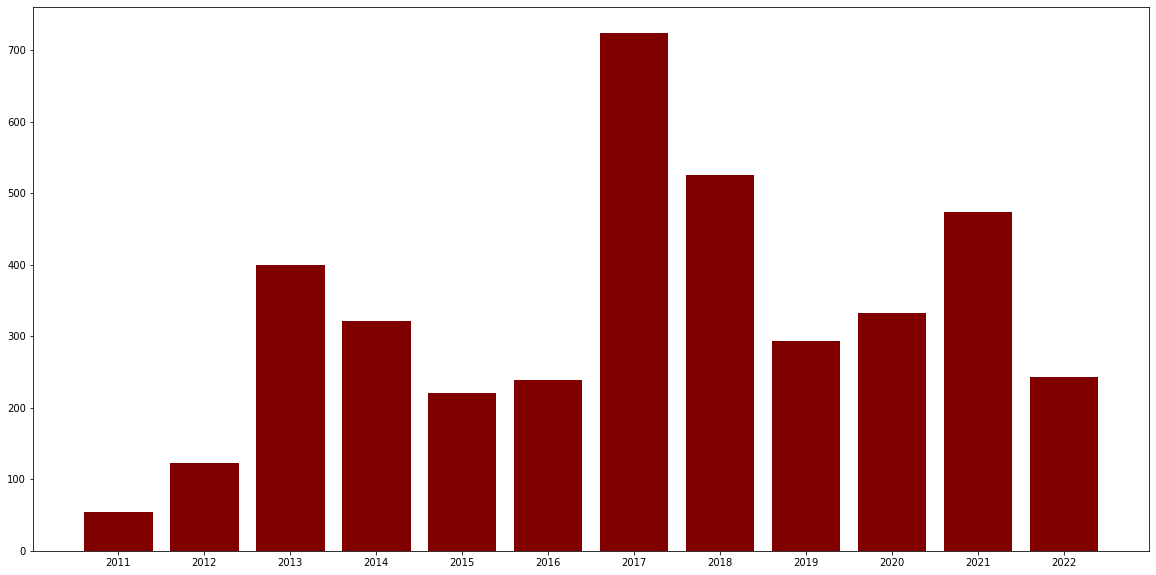

In [ ]:
import pandas as pd
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), StringType()) 

df_posts_sp1 = df_posts_sp.filter(df_posts_sp._Tags.like('%wallet%'))
df_posts_sp1 = df_posts_sp1.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))
states2=df_posts_sp1.rdd.map(lambda x: x.Creation_date_1).collect()
states3 = pd.Series(states2)
states3 = states3.value_counts()
states3 = states3.sort_index()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(states3.keys(), states3.values, color ='maroon')

In [ ]:
def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), IntegerType()) 
df_posts_sp1 = df_posts_sp.filter(df_posts_sp._Tags.like('%wallet%'))
df_posts_sp1 = df_posts_sp1.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))
df_posts_sp_2 = df_posts_sp1
df_posts_sp3 = df_posts_sp_2.groupBy("Creation_date_1").count()
df_posts_sp3 = df_posts_sp3.sort(col("Creation_date_1"))
df_posts_ps4 = ps.DataFrame(df_posts_sp3)
df_posts_ps4 = df_posts_ps4.reset_index()
df_posts_ps4.plot.line(x='index', y='count')

<BarContainer object of 12 artists>

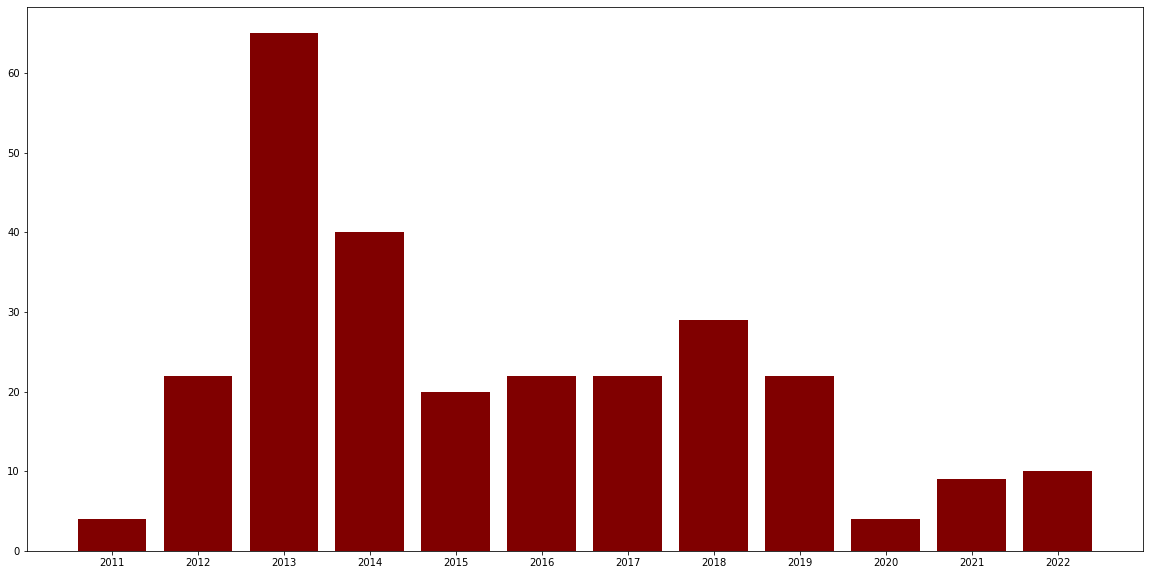

In [ ]:
import pandas as pd
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), StringType()) 

df_posts_sp1 = df_posts_sp.filter(df_posts_sp._Tags.like('%hashpower%'))
df_posts_sp1 = df_posts_sp1.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))
states2=df_posts_sp1.rdd.map(lambda x: x.Creation_date_1).collect()
states3 = pd.Series(states2)
states3 = states3.value_counts()
states3 = states3.sort_index()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(states3.keys(), states3.values, color ='maroon')

In [ ]:
def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), IntegerType()) 
df_posts_sp1 = df_posts_sp.filter(df_posts_sp._Tags.like('%hashpower%'))
df_posts_sp1 = df_posts_sp1.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))
df_posts_sp_2 = df_posts_sp1
df_posts_sp3 = df_posts_sp_2.groupBy("Creation_date_1").count()
df_posts_sp3 = df_posts_sp3.sort(col("Creation_date_1"))
df_posts_ps4 = ps.DataFrame(df_posts_sp3)
df_posts_ps4 = df_posts_ps4.reset_index()
df_posts_ps4.plot.line(x='index', y='count')

<BarContainer object of 12 artists>

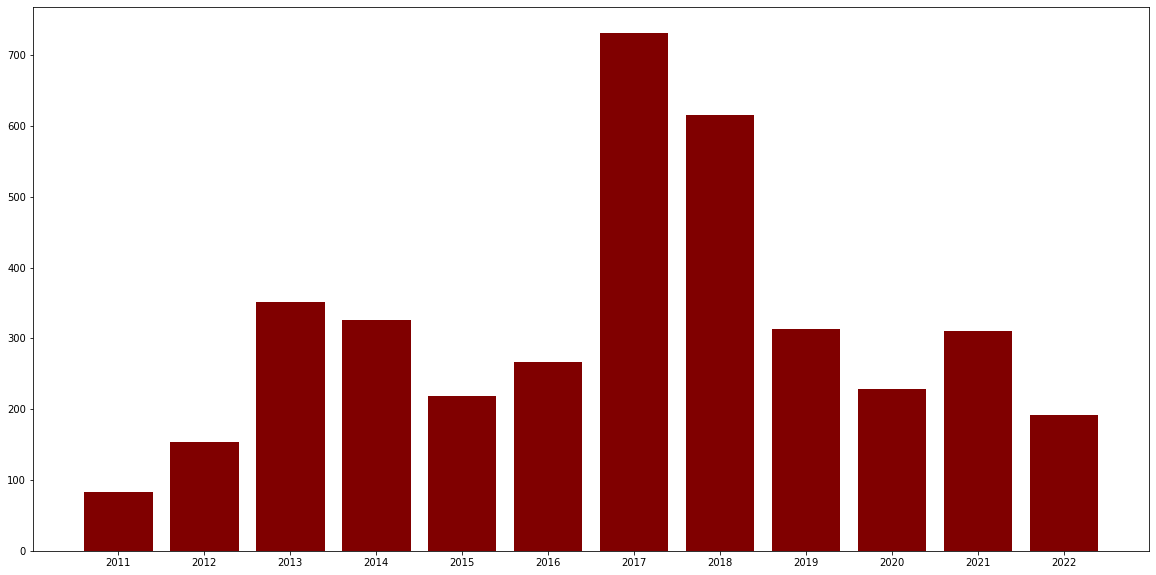

In [ ]:
import pandas as pd
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), StringType()) 

df_posts_sp1 = df_posts_sp.filter(df_posts_sp._Tags.like('%transactions%'))
df_posts_sp1 = df_posts_sp1.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))
states2=df_posts_sp1.rdd.map(lambda x: x.Creation_date_1).collect()
states3 = pd.Series(states2)
states3 = states3.value_counts()
states3 = states3.sort_index()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(states3.keys(), states3.values, color ='maroon')

In [ ]:
def get_month(x):
    return x.year
get_month_udf = udf(lambda x:get_month(x), IntegerType()) 
df_posts_sp1 = df_posts_sp.filter(df_posts_sp._Tags.like('%transactions%'))
df_posts_sp1 = df_posts_sp1.withColumn("Creation_date_1", get_month_udf(col("_CreationDate")))
df_posts_sp_2 = df_posts_sp1
df_posts_sp3 = df_posts_sp_2.groupBy("Creation_date_1").count()
df_posts_sp3 = df_posts_sp3.sort(col("Creation_date_1"))
df_posts_ps4 = ps.DataFrame(df_posts_sp3)
df_posts_ps4 = df_posts_ps4.reset_index()
df_posts_ps4.plot.line(x='index', y='count')

g. Liczba postów w czasie dla każdego z top N tagów (lineplot/barplot) - KONIEC

h. najczęściej pojawiające się słowa w tytułach (z pominięciem stopwords)

In [ ]:
# Próba funcji explode
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
df_posts_sp2 = df_posts_sp.select(df_posts_sp["_Id"], df_posts_sp["_Title"])
from pyspark.sql.functions import split, explode
df_posts_sp3 = df_posts_sp2.withColumn('_Title', explode(split('_Title',' ')))
df_posts_sp3_ps = ps.DataFrame(df_posts_sp3)
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
import re

def correct_word(x):
    word = re.sub('[^A-Za-z0-9]+', '', x)
    word = word.lower()
    return(word)

correct_word_udf = udf(lambda x:correct_word(x), StringType()) 

df_posts_sp4 = df_posts_sp3.withColumn("word2", correct_word_udf(col("_Title")))
df_posts_sp5 = df_posts_sp4.groupBy("word2").count().orderBy(col("count").desc())
df_posts_sp4_ps = ps.DataFrame(df_posts_sp5)
df_posts_sp4_ps.head(10)

,word2,count
0,to,9558
1,the,8744
2,bitcoin,7728
3,a,7694
4,how,6903
5,is,5558
6,in,4443
7,of,4413
8,i,3807
9,what,3404


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from pyspark.sql.types import BooleanType
def check_stopword(x):
    return x in stopwords.words('english')

check_stopword_udf = udf(lambda x:check_stopword(x), BooleanType()) 

In [ ]:
df_posts_sp5 = df_posts_sp5.withColumn("word_stop", check_stopword_udf(col("word2")))

In [ ]:
df_posts_sp5_ps = ps.DataFrame(df_posts_sp5)
df_posts_sp5_ps[~df_posts_sp5_ps['word_stop']].head(10)

,word2,count,word_stop
2,bitcoin,7728,False
10,wallet,3093,False
11,transaction,3064,False
21,address,2025,False
25,block,1596,False
26,,1544,False
27,blockchain,1458,False
28,transactions,1439,False
29,mining,1352,False
32,key,1283,False


Najczęściej pojawiające się słowa w tytułach (z pominięciem stopwords) - KONIEC

Spark NLP

i. procent użytkowników którzy nigdy nic nie zapostowali

In [ ]:
df_users = sqlContext.read.parquet("df_users.parquet")
import pyspark.pandas as ps
df_users_ps = ps.DataFrame(df_users)
df_users_sp = df_users_ps.to_spark()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

In [ ]:
df_users_ps2 = df_users_ps[['_Id', '_DisplayName']]
df_users_ps2 = df_users_ps2.set_index('_Id')

df_posts_ps2 = df_posts_ps[['_OwnerUserId', '_PostTypeId']]
df_posts_ps2 = df_posts_ps2.to_spark()
df_posts_ps2 = df_posts_ps2.dropDuplicates(['_OwnerUserId'])
df_posts_ps2 = ps.DataFrame(df_posts_ps2)
df_posts_ps2 = df_posts_ps2[df_posts_ps2['_PostTypeId'] == 1]
df_posts_ps2 = df_posts_ps2.set_index('_OwnerUserId')

In [ ]:
df3 = df_users_ps2.join(df_posts_ps2)

In [ ]:
f'Procent użytkowników, którzy nigdy nie nie zapostoali wynosi około {np.round(100 * df3._PostTypeId.isnull().mean(), 2)}%.'

'Procent użytkowników, którzy nigdy nie nie zapostoali wynosi około 86.11%.'

i. procent użytkowników którzy nigdy nic nie zapostowali - KONIEC

j. średni czas od pojawienia się pytania do pojawienia się zaakceptowanej
odpowiedzi

In [ ]:
df_votes = sqlContext.read.parquet("df_votes.parquet")
import pyspark.pandas as ps
df_votes_ps = ps.DataFrame(df_votes)
df_votes_sp = df_votes_ps.to_spark()

df_votes_ps_1 = df_votes_ps[df_votes_ps['_VoteTypeId'] == "1"] 

In [ ]:
# Weźmy zaakceptowane odpowiedzi:

df_votes_ps_1 = df_votes_ps[df_votes_ps['_VoteTypeId'] == "1"] 
df_votes_ps_1 = df_votes_ps_1[["_PostId", "_VoteTypeId"]]
df_votes_ps_1 = df_votes_ps_1.set_index("_PostId")
df_votes_ps_1.head(10)

,_VoteTypeId
_PostId,
77,1
158,1
159,1
149,1
166,1
190,1
198,1
120,1
234,1


In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

df_posts_ps_odp = df_posts_ps[df_posts_ps['_PostTypeId'] == 2]
df_posts_ps_odp = df_posts_ps_odp[["_Id", "_ParentId", "_CreationDate"]]
df_posts_ps_odp = df_posts_ps_odp.set_index("_Id")

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
df2 = df_votes_ps_1.join(df_posts_ps_odp)

In [ ]:
df2 = df2.set_index("_ParentId")
df2.head()

,_VoteTypeId,_CreationDate
_ParentId,,
59,1,2011-08-30 22:04:16.000
128,1,2011-08-30 23:51:09.433
151,1,2011-08-30 23:52:50.960
103,1,2011-08-30 23:41:02.250
164,1,2011-08-31 00:05:56.160


In [ ]:
df_posts = sqlContext.read.parquet("df_posts.parquet")
import pyspark.pandas as ps
df_posts_ps = ps.DataFrame(df_posts)
df_posts_sp = df_posts_ps.to_spark()

df_posts_ps_gw = df_posts_ps[df_posts_ps['_PostTypeId'] == 1]
df_posts_ps_gw = df_posts_ps_gw[["_Id", "_CreationDate"]]
df_posts_ps_gw = df_posts_ps_gw.set_index("_Id")
df_posts_ps_gw.head()

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



,_CreationDate
_Id,
1,2011-08-30 21:12:34.090
2,2011-08-30 21:14:50.327
3,2011-08-30 21:14:52.000
8,2011-08-30 21:18:22.287
9,2011-08-30 21:18:25.467


In [ ]:
df3 = df2.join(df_posts_ps_gw, lsuffix = "_odp", rsuffix = "_pyt")

In [ ]:
df3.head(5)

,_VoteTypeId,_CreationDate_odp,_CreationDate_pyt
_ParentId,,,
59,1,2011-08-30 22:04:16.000,2011-08-30 21:54:14.593
128,1,2011-08-30 23:51:09.433,2011-08-30 23:11:51.003
151,1,2011-08-30 23:52:50.960,2011-08-30 23:43:26.133
103,1,2011-08-30 23:41:02.250,2011-08-30 22:38:24.593
164,1,2011-08-31 00:05:56.160,2011-08-30 23:59:28.087


In [ ]:
df4 = df3.to_spark()
from pyspark.sql.functions import *
from pyspark.sql.functions import round, col, max
df5 = df4.select(
      col("_VoteTypeId"),
      round(datediff(col("_CreationDate_odp"), col("_CreationDate_pyt")), 3).alias("Okres")
    )


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



In [ ]:
df6 = ps.DataFrame(df5)
df6.head(10)

,_VoteTypeId,Okres
0,1,0
1,1,0
2,1,0
3,1,0
4,1,1
5,1,0
6,1,0
7,1,0
8,1,1
9,1,1


In [ ]:
f'Średni czas wynosi około {np.round(df6["Okres"].mean())} dni.'

'Średni czas wynosi około 15.0 dni.'

In [ ]:
pip install spark-nlp==4.2.6 pyspark==3.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.4/453.4 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.2.3-py2.py3-none-any.whl size=281990673 sha256=ac29e2f30f6f2be0c9b2476486eb17218088f73405fd973754763a214b21baf8
  Stored in directory: /root/.cache/pip/wheels/9a/99/8c/e2d5ede0e1aefb33c64af344f2cd569354237f0bdd673bd243
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.3.1
    Uninstalling pyspark-3.3.1:
      Successfully uninstalled pyspark-3.3.1
